In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin-1')
df.head()

<ipython-input-91-e6908ec0ccb3>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,

In [92]:
selected_columns = [
    'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
    'city', 'latitude', 'longitude','attacktype1_txt', 'targtype1_txt','gname', 'motive','weaptype1_txt',
    'nkill','nwound','property'
]

In [93]:
selected_df = df[selected_columns]

In [94]:
selected_df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'attacktype1_txt', 'targtype1_txt', 'gname', 'motive', 'weaptype1_txt',
       'nkill', 'nwound', 'property'],
      dtype='object')

In [95]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  targtype1_txt    181691 non-null  object 
 11  gname            181691 non-null  object 
 12  motive           50561 non-null   object 
 13  weaptype1_txt    181691 non-null  object 
 14  nkill            171378 non-null  float64
 15  nwound           165380 non-null  float64
 16  property         181691 non-null  int6

In [96]:

selected_df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound,property
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,-0.544556
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,3.122889
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,-9.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,1.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000


In [97]:
selected_df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
targtype1_txt           0
gname                   0
motive             131130
weaptype1_txt           0
nkill               10313
nwound              16311
property                0
dtype: int64

In [98]:
selected_df.shape

(181691, 17)

In [99]:

selected_df.dtypes

iyear                int64
imonth               int64
iday                 int64
country_txt         object
region_txt          object
provstate           object
city                object
latitude           float64
longitude          float64
attacktype1_txt     object
targtype1_txt       object
gname               object
motive              object
weaptype1_txt       object
nkill              float64
nwound             float64
property             int64
dtype: object

In [100]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day'},inplace=True)

In [101]:

selected_df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
targtype1_txt           0
gname                   0
motive             131130
weaptype1_txt           0
nkill               10313
nwound              16311
property                0
dtype: int64

In [102]:
# Data Cleaning (Dealing with Missing values)
df['provstate'].fillna('Unknown', inplace=True)
df['motive'].fillna('Unknown', inplace=True)
df['nkill'].fillna(0, inplace=True)
df['nwound'].fillna(0, inplace=True)

In [103]:
#Distribution of Incidents Over year
print(f"\nvalue countyear")
print(selected_df["iyear"].value_counts().sort_values(ascending=False))



value countyear
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64


In [ ]:
temporal_grouped = df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='incident_count')
temporal_grouped1 = df.groupby(['latitude', 'longitude']).size().reset_index(name='count')


In [ ]:

#Time Series of Terrorist attacks
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='incident_count',data=temporal_grouped)
plt.title('Terrorist Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

In [ ]:
#geographical visualizations of terrorism

# Drop rows with NaN values in 'latitude' or 'longitude'
selected_df_cleaned = selected_df.dropna(subset=['latitude', 'longitude'])

# Create a folium map centered around the mean latitude and longitude
map_center = [selected_df_cleaned['latitude'].mean(), selected_df_cleaned['longitude'].mean()]
terrorism_map = folium.Map(location=map_center, zoom_start=2)

# Add a heatmap layer based on the incident locations
heat_data = [[row['latitude'], row['longitude']] for _, row in selected_df_cleaned.iterrows()]
HeatMap(heat_data).add_to(terrorism_map)

# Display the map
terrorism_map


In [ ]:
# Your original code
categorical_columns = ['region_txt']
for column in categorical_columns:
    print(f"\nDistribution of {column}:")
    print(df[column].value_counts())

In [ ]:
import pandas as pd

# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Your original code
categorical_columns = ['country_txt']
for column in categorical_columns:
    print(f"\nDistribution of {column}:")
    print(df[column].value_counts())


In [ ]:
#distribution of incidents across countries and regions

# Select the top 20 countries by incident count
top_countries = selected_df['country_txt'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 countries
selected_df_top_countries = selected_df[selected_df['country_txt'].isin(top_countries)]

# Explore the distribution of incidents across regions (HIGH RISK REGION)
plt.figure(figsize=(10, 6))
sns.countplot(x='region_txt', data=selected_df, order=selected_df['region_txt'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Terrorism Incidents Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.show()

# Explore the distribution of incidents across the top 20 countries
plt.figure(figsize=(15, 8))
sns.countplot(x='country_txt', data=selected_df_top_countries, order=top_countries)
plt.xticks(rotation=90)
plt.title('Distribution of Terrorism Incidents Across Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.show()





In [ ]:
# Explore the distribution of attacks based on target types
plt.figure(figsize=(15, 8))
sns.countplot(x='targtype1_txt', data=selected_df, order=selected_df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Terrorism Incidents Based on Target Types')
plt.xlabel('Target Type')
plt.ylabel('Number of Incidents')
plt.show()


In [ ]:
# Plot the distribution of attacks
plt.figure(figsize=(12, 6))
sns.countplot(x='attacktype1_txt', data=selected_df, order=selected_df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Terrorism Incidents Based on Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.show()


In [ ]:
#Dstribution of incidents based on terrorist groups
plt.figure(figsize=(15, 8))
sns.countplot(x='gname', data=selected_df, order=selected_df['gname'].value_counts().nlargest(10).index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Terrorism Incidents Based on Terrorist Groups')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Incidents')
plt.show()

In [ ]:
#Notorious terrorist groups in each country
import pandas as pd

# Assuming 'unknown' is the value representing unknown in the 'gname' column
selected_df_no_unknown = selected_df[selected_df['gname'] != 'Unknown']

# Group by country and terrorist group, count incidents, and find the group with the highest count in each country
most_notorious_per_country = selected_df_no_unknown.groupby(['country_txt', 'gname']).size().reset_index(name='incident_count')
most_notorious_per_country = most_notorious_per_country.loc[most_notorious_per_country.groupby('country_txt')['incident_count'].idxmax()]

# Display the result with 'Country' and 'gname' side by side
most_notorious_per_country[['country_txt', 'gname', 'incident_count']]


In [ ]:
#Distribution of 'nkill' and 'nwound'

# Filter out rows with NaN values in 'nkill'
nkill_values = selected_df['nkill'].dropna()

# Display the unique top 10 'nkill' values in descending order
top_nkill_values = nkill_values.sort_values(ascending=False).unique()[:10]

print("Top 10 unique 'nkill' values in descending order:")
for value in top_nkill_values:
    print(value)
# Filter out rows with NaN values in 'nwound'
nwound_values = selected_df['nwound'].dropna()

# Display the unique top 10 'nwound' values in descending order
top_nwound_values = nwound_values.sort_values(ascending=False).unique()[:10]

print("Top 10 unique 'nwound' values in descending order:")
for value in top_nwound_values:
    print(value)



Top 10 unique 'nkill' values in descending order:
1570.0
1384.0
1383.0
1180.0
953.0
670.0
588.0
518.0
517.0
433.0
Top 10 unique 'nwound' values in descending order:
8191.0
8190.0
5500.0
4000.0
1500.0
1272.0
1001.0
851.0
817.0
800.0


In [ ]:
# Top 10 Massacre
# Function to display incident information as a table
def display_table(incidents_df, title):
    headers = ["region_txt","country_txt", "targtype1_txt", "attacktype1_txt", "weaptype1_txt", "gname", "nkill", "nwound"]

    print(f"\n{title}\n")

    # Find the maximum length of each column
    max_lengths = [max(len(str(row[col])) for _, row in incidents_df.iterrows()) for col in headers]

    # Print headers
    header_row = "|".join(f"{header.replace('_txt', ''):^{max_lengths[i]}}" for i, header in enumerate(headers))
    print(header_row)
    print("-" * len(header_row))

    # Print data
    for _, row in incidents_df.iterrows():
        data_row = "|".join(f"{str(row[col]):^{max_lengths[i]}}" for i, col in enumerate(headers))
        print(data_row)

# Sort the DataFrame by 'nkill' and 'nwound' in descending order
sorted_df_nkill = selected_df.sort_values(by='nkill', ascending=False)
sorted_df_nwound = selected_df.sort_values(by='nwound', ascending=False)

# Display the top 10 incidents by 'nkill' and 'nwound' as tables
display_table(sorted_df_nkill.head(10), "Top 10 Incidents by 'nkill'")
display_table(sorted_df_nwound.head(10), "Top 10 Incidents by 'nwound'")



Top 10 Incidents by 'nkill'

          region          |   country   |         targtype1         |        attacktype1        |                                 weaptype1                                 |                   gname                   |nkill |nwound
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Middle East & North Africa|    Iraq     |         Military          |Hostage Taking (Kidnapping)|                                 Firearms                                  |Islamic State of Iraq and the Levant (ISIL)|1570.0| 0.0  
      North America       |United States|Private Citizens & Property|         Hijacking         |Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)|                 Al-Qaida                  |1384.0|8190.0
      North America       |United States|Priva

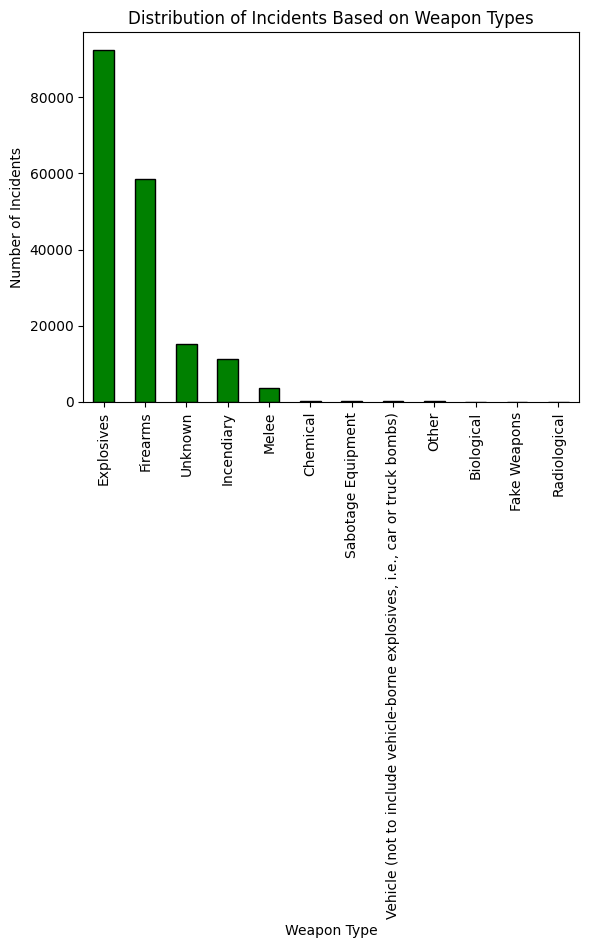

In [ ]:
#Distribution of incidents based on weapon types
weapon_type_counts = selected_df['weaptype1_txt'].value_counts()
weapon_type_counts.plot(kind='bar', color='green', edgecolor='black')

plt.title('Distribution of Incidents Based on Weapon Types')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Incidents')
plt.show()


In [ ]:
#Terrorist attack characteristics of 20 incidents
# Group by specified columns and count the incidents
temporal_grouped = df.groupby(['country_txt', 'weaptype1_txt', 'targtype1_txt', 'attacktype1_txt']).size().reset_index(name='incident_count')

# Sort by incident_count in descending order and print the top 20
print(temporal_grouped.sort_values(by='incident_count', ascending=False).head(20))



      country_txt weaptype1_txt                targtype1_txt    attacktype1_txt  incident_count
4539         Iraq    Explosives  Private Citizens & Property  Bombing/Explosion            7235
4533         Iraq    Explosives                       Police  Bombing/Explosion            2419
4525         Iraq    Explosives                     Military  Bombing/Explosion            2196
4503         Iraq    Explosives                     Business  Bombing/Explosion            1828
45    Afghanistan    Explosives  Private Citizens & Property  Bombing/Explosion            1513
7282     Pakistan    Explosives  Private Citizens & Property  Bombing/Explosion            1505
2777  El Salvador      Firearms                     Military      Armed Assault            1337
41    Afghanistan    Explosives                       Police  Bombing/Explosion            1331
4554         Iraq    Explosives                      Unknown  Bombing/Explosion            1279
99    Afghanistan      Firearms         

In [ ]:
#Factors contributing to terrorist activities
print(df['motive'].value_counts())

Unknown                                                                                                                                                                                                                                                                                                                                                                                                  106819
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                                                             6906
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.      

In [ ]:
#Factors contributing to terrorist activities
print(df['summary'].value_counts())

05/11/2012: Assailants detonated an explosive device in a holiday home in Corsica region, France. This was one of 26 attacks on vacation homes throughout the island on May 11, 2012. The Corsican National Liberation Front (FLNC) claimed responsibility for the incidents, stating they carried out the attack to fight property speculation.                                                                                                                                 26
12/08/2012: Assailants detonated an explosive device at an under-construction vacation home in Corsica region, France. This was one of 24 similar attacks on the same night. There were no reported casualties; however, 26 houses were destroyed in the blasts. The Corsican National Liberation Front (FLNC) claimed responsibility for the incident by writing the group name on the walls of one of the targeted houses.                                                     24
02/09/2015: Assailants attacked residents and buildings in Logo 